<a href="https://colab.research.google.com/github/Vanitha-Jain/capstone/blob/Feature-selection-new/KRCFS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv('/content/KlekotaRothCount.csv')
data


,Name,KRFPC1,KRFPC2,KRFPC3,KRFPC4,KRFPC5,KRFPC6,KRFPC7,KRFPC8,KRFPC9,...,KRFPC4852,KRFPC4853,KRFPC4854,KRFPC4855,KRFPC4856,KRFPC4857,KRFPC4858,KRFPC4859,KRFPC4860,bioactivity_class
0,CHEMBL167155,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,inactive
1,CHEMBL166740,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,inactive
2,CHEMBL165038,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,inactive
3,CHEMBL435857,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,inactive
4,CHEMBL352783,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,CHEMBL5429863,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1225,CHEMBL5436920,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1226,CHEMBL5405698,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1227,CHEMBL5416562,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


In [2]:
data.dtypes

,0
Name,object
KRFPC1,int64
KRFPC2,int64
KRFPC3,int64
KRFPC4,int64
...,...
KRFPC4857,int64
KRFPC4858,int64
KRFPC4859,int64
KRFPC4860,int64


In [3]:
data['bioactivity_class'].replace('active', 'P', inplace=True)
data['bioactivity_class'].replace('inactive', 'N', inplace=True)
data.rename(columns = {"bioactivity_class": "class"}, inplace = True)
data

<ipython-input-3-d75cbf56e791>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bioactivity_class'].replace('active', 'P', inplace=True)
<ipython-input-3-d75cbf56e791>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,Name,KRFPC1,KRFPC2,KRFPC3,KRFPC4,KRFPC5,KRFPC6,KRFPC7,KRFPC8,KRFPC9,...,KRFPC4852,KRFPC4853,KRFPC4854,KRFPC4855,KRFPC4856,KRFPC4857,KRFPC4858,KRFPC4859,KRFPC4860,class
0,CHEMBL167155,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,N
1,CHEMBL166740,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,N
2,CHEMBL165038,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,N
3,CHEMBL435857,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,N
4,CHEMBL352783,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,CHEMBL5429863,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
1225,CHEMBL5436920,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
1226,CHEMBL5405698,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
1227,CHEMBL5416562,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N


In [4]:
data['class'].replace('P', '1', inplace=True)
data['class'].replace('N', '0', inplace=True)
data.rename(columns = {"class": "class"}, inplace = True)
data

<ipython-input-4-546e5797bc7a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['class'].replace('P', '1', inplace=True)
<ipython-input-4-546e5797bc7a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

,Name,KRFPC1,KRFPC2,KRFPC3,KRFPC4,KRFPC5,KRFPC6,KRFPC7,KRFPC8,KRFPC9,...,KRFPC4852,KRFPC4853,KRFPC4854,KRFPC4855,KRFPC4856,KRFPC4857,KRFPC4858,KRFPC4859,KRFPC4860,class
0,CHEMBL167155,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,CHEMBL166740,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,CHEMBL165038,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,CHEMBL435857,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,CHEMBL352783,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,CHEMBL5429863,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1225,CHEMBL5436920,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1226,CHEMBL5405698,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1227,CHEMBL5416562,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.isnull().sum().sum()

0

In [6]:
data.dropna(inplace =True)
data.isnull().sum().sum()


0

In [7]:
data1 = data.iloc[:,1:4861]
data1
data2 = data.iloc[:,-1]


In [8]:
data1
data2

,class
0,0
1,0
2,0
3,0
4,0
...,...
1224,0
1225,0
1226,0
1227,0


In [9]:

from sklearn.feature_selection import VarianceThreshold
threshold = VarianceThreshold(threshold=.1)
def variance_threshold_selector(data1, threshold=0.10):
    selector = VarianceThreshold(threshold)
    selector.fit(data1)
    return data[data1.columns[selector.get_support(indices=True)]]
data1_HV = variance_threshold_selector(data1)


In [10]:
data1_HV = variance_threshold_selector(data1)
data1_HV

,KRFPC1,KRFPC2,KRFPC14,KRFPC16,KRFPC17,KRFPC18,KRFPC20,KRFPC72,KRFPC92,KRFPC126,...,KRFPC4770,KRFPC4810,KRFPC4811,KRFPC4821,KRFPC4824,KRFPC4826,KRFPC4829,KRFPC4830,KRFPC4843,KRFPC4853
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1225,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1226,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1227,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data2_HV = pd.merge(data1_HV,data2,left_index=True,right_index=True)
data2_HV

,KRFPC1,KRFPC2,KRFPC14,KRFPC16,KRFPC17,KRFPC18,KRFPC20,KRFPC72,KRFPC92,KRFPC126,...,KRFPC4810,KRFPC4811,KRFPC4821,KRFPC4824,KRFPC4826,KRFPC4829,KRFPC4830,KRFPC4843,KRFPC4853,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1225,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1226,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1227,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
## remove features that display high correlation with many othe features
correlated_features_1 = set()
corr_matrix_class = data2_HV.corr(numeric_only=True)


for i in range(len(corr_matrix_class.columns)):
    for j in range(i):
        if abs(corr_matrix_class.iloc[i, j]) > 0.9:
            colname = corr_matrix_class.columns[i]
            correlated_features_1.add(colname)
correlated_features_1

{'KRFPC20',
 'KRFPC2949',
 'KRFPC302',
 'KRFPC3025',
 'KRFPC303',
 'KRFPC3058',
 'KRFPC307',
 'KRFPC314',
 'KRFPC3224',
 'KRFPC3295',
 'KRFPC3302',
 'KRFPC3336',
 'KRFPC3369',
 'KRFPC3375',
 'KRFPC3388',
 'KRFPC3394',
 'KRFPC3395',
 'KRFPC3402',
 'KRFPC3404',
 'KRFPC341',
 'KRFPC3418',
 'KRFPC3440',
 'KRFPC3455',
 'KRFPC346',
 'KRFPC347',
 'KRFPC348',
 'KRFPC3593',
 'KRFPC3640',
 'KRFPC3646',
 'KRFPC3647',
 'KRFPC3648',
 'KRFPC3649',
 'KRFPC3655',
 'KRFPC3657',
 'KRFPC3659',
 'KRFPC3660',
 'KRFPC3662',
 'KRFPC3671',
 'KRFPC3692',
 'KRFPC3693',
 'KRFPC3701',
 'KRFPC3706',
 'KRFPC3707',
 'KRFPC3709',
 'KRFPC3712',
 'KRFPC3716',
 'KRFPC3718',
 'KRFPC3719',
 'KRFPC3721',
 'KRFPC3722',
 'KRFPC3725',
 'KRFPC3727',
 'KRFPC3730',
 'KRFPC3731',
 'KRFPC3733',
 'KRFPC3737',
 'KRFPC3738',
 'KRFPC3740',
 'KRFPC3742',
 'KRFPC3744',
 'KRFPC3746',
 'KRFPC3750',
 'KRFPC3752',
 'KRFPC3757',
 'KRFPC3764',
 'KRFPC3773',
 'KRFPC3775',
 'KRFPC3777',
 'KRFPC3781',
 'KRFPC3782',
 'KRFPC3783',
 'KRFPC3785',
 '

In [13]:
def remove_correlated_features(features, data):
    for x in features:
        data.drop(x, axis=1, inplace=True)
    return data


In [14]:
data3= remove_correlated_features(correlated_features_1, data2_HV)
data3

,KRFPC1,KRFPC2,KRFPC14,KRFPC16,KRFPC17,KRFPC18,KRFPC72,KRFPC92,KRFPC126,KRFPC133,...,KRFPC4757,KRFPC4763,KRFPC4810,KRFPC4811,KRFPC4821,KRFPC4824,KRFPC4826,KRFPC4830,KRFPC4853,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1225,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1226,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1227,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data3.to_csv('KRCFS2.csv')

In [16]:
X = data3.iloc[:,1:161]  #independent columns
X
y = data3.iloc[:,-1]
y   #target column i.e price range

,class
0,0
1,0
2,0
3,0
4,0
...,...
1224,0
1225,0
1226,0
1227,0


In [17]:
X

,KRFPC2,KRFPC14,KRFPC16,KRFPC17,KRFPC18,KRFPC72,KRFPC92,KRFPC126,KRFPC133,KRFPC297,...,KRFPC4752,KRFPC4757,KRFPC4763,KRFPC4810,KRFPC4811,KRFPC4821,KRFPC4824,KRFPC4826,KRFPC4830,KRFPC4853
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1225,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1226,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1227,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.preprocessing import StandardScaler
# y = data['class']
# X_features =data.drop(columns='class')
scaler = StandardScaler()
X_transform = scaler.fit_transform(X)
X_transform_pd = pd.DataFrame(X_transform, columns = X.columns)
X_transform_pd

# #Standardize/normalize the data
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# X_transform = sc.fit_transform(X)
# X_transform

,KRFPC2,KRFPC14,KRFPC16,KRFPC17,KRFPC18,KRFPC72,KRFPC92,KRFPC126,KRFPC133,KRFPC297,...,KRFPC4752,KRFPC4757,KRFPC4763,KRFPC4810,KRFPC4811,KRFPC4821,KRFPC4824,KRFPC4826,KRFPC4830,KRFPC4853
0,-0.370896,-0.32087,-0.128268,-0.337168,-0.335928,-0.244045,-0.22452,-0.416199,-0.329104,-0.94943,...,-0.340669,-0.257631,-0.227638,-0.26578,-0.251096,-0.237833,-0.128804,-0.198858,-0.143177,2.806072
1,-0.370896,-0.32087,-0.128268,-0.337168,-0.335928,-0.244045,-0.22452,-0.416199,-0.329104,-0.94943,...,-0.340669,-0.257631,-0.227638,-0.26578,-0.251096,-0.237833,-0.128804,-0.198858,-0.143177,5.901819
2,-0.370896,-0.32087,-0.128268,-0.337168,-0.335928,-0.244045,-0.22452,-0.416199,-0.329104,-0.94943,...,-0.340669,-0.257631,-0.227638,-0.26578,-0.251096,-0.237833,-0.128804,-0.198858,-0.143177,2.806072
3,-0.370896,-0.32087,-0.128268,-0.337168,-0.335928,-0.244045,-0.22452,-0.416199,-0.329104,-0.94943,...,-0.340669,-0.257631,-0.227638,-0.26578,-0.251096,-0.237833,-0.128804,-0.198858,-0.143177,2.806072
4,-0.370896,-0.32087,-0.128268,-0.337168,-0.335928,-0.244045,-0.22452,-0.416199,-0.329104,-0.94943,...,-0.340669,-0.257631,-0.227638,-0.26578,-0.251096,-0.237833,-0.128804,-0.198858,-0.143177,2.806072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,-0.370896,-0.32087,-0.128268,-0.337168,-0.335928,-0.244045,-0.22452,1.817461,-0.329104,-0.94943,...,-0.340669,-0.257631,-0.227638,-0.26578,-0.251096,-0.237833,-0.128804,-0.198858,-0.143177,-0.289675
1225,-0.370896,-0.32087,-0.128268,-0.337168,-0.335928,-0.244045,-0.22452,1.817461,-0.329104,-0.94943,...,-0.340669,-0.257631,-0.227638,-0.26578,-0.251096,-0.237833,-0.128804,-0.198858,-0.143177,-0.289675
1226,-0.370896,-0.32087,-0.128268,-0.337168,-0.335928,-0.244045,-0.22452,1.817461,-0.329104,-0.94943,...,-0.340669,-0.257631,-0.227638,-0.26578,-0.251096,-0.237833,-0.128804,-0.198858,-0.143177,-0.289675
1227,-0.370896,-0.32087,-0.128268,-0.337168,-0.335928,-0.244045,-0.22452,1.817461,-0.329104,-0.94943,...,-0.340669,-0.257631,-0.227638,-0.26578,-0.251096,-0.237833,-0.128804,-0.198858,-0.143177,-0.289675


In [19]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
kBest = SelectKBest(mutual_info_classif, k = 15)
X_kBestFeatures = kBest.fit_transform(X, y)
X_kBestFeatures.shape


(1229, 15)

In [20]:
kBest.get_support(True)

array([  9,  13,  44,  46,  50,  55,  91,  94,  95, 115, 120, 121, 126,
       140, 150])

In [21]:
X_kBestFeatures = X.iloc[:, kBest.get_support(True)]
X_kBestFeatures.columns


Index(['KRFPC297', 'KRFPC344', 'KRFPC2262', 'KRFPC2265', 'KRFPC2667',
       'KRFPC2975', 'KRFPC3599', 'KRFPC3609', 'KRFPC3643', 'KRFPC3751',
       'KRFPC3779', 'KRFPC3786', 'KRFPC3921', 'KRFPC4269', 'KRFPC4752'],
      dtype='object')

In [22]:
f = kBest.get_support(1)
X_new = X[X.columns[f]]
X_new
data_scores = pd.DataFrame(kBest.scores_)
data_columns = pd.DataFrame(X.columns)

In [23]:
#Concat two dataframes for better visualization
featureScores = pd.concat([data_columns, data_scores], axis = 1)

#naming the dataframe columns
featureScores.columns = ['Features', 'Scores']
featureScores

,Features,Scores
0,KRFPC2,0.038971
1,KRFPC14,0.011927
2,KRFPC16,0.016922
3,KRFPC17,0.000000
4,KRFPC18,0.010949
...,...,...
155,KRFPC4821,0.000000
156,KRFPC4824,0.027051
157,KRFPC4826,0.008636
158,KRFPC4830,0.000000


In [24]:

#Print top 15 best features
print(featureScores.nlargest(15, 'Scores'))

      Features    Scores
55   KRFPC2975  0.103196
94   KRFPC3609  0.083119
50   KRFPC2667  0.075920
140  KRFPC4269  0.067506
91   KRFPC3599  0.063759
46   KRFPC2265  0.058436
115  KRFPC3751  0.056434
120  KRFPC3779  0.053707
44   KRFPC2262  0.053110
95   KRFPC3643  0.052348
126  KRFPC3921  0.051147
150  KRFPC4752  0.046902
121  KRFPC3786  0.045475
9     KRFPC297  0.045086
13    KRFPC344  0.044404


In [25]:
Graph = (featureScores.nlargest(15, 'Scores'))
Graph


,Features,Scores
55,KRFPC2975,0.103196
94,KRFPC3609,0.083119
50,KRFPC2667,0.075920
140,KRFPC4269,0.067506
91,KRFPC3599,0.063759
46,KRFPC2265,0.058436
115,KRFPC3751,0.056434
120,KRFPC3779,0.053707
44,KRFPC2262,0.053110
95,KRFPC3643,0.052348


In [26]:
Graph.to_csv('KRCFS2_Features.csv')

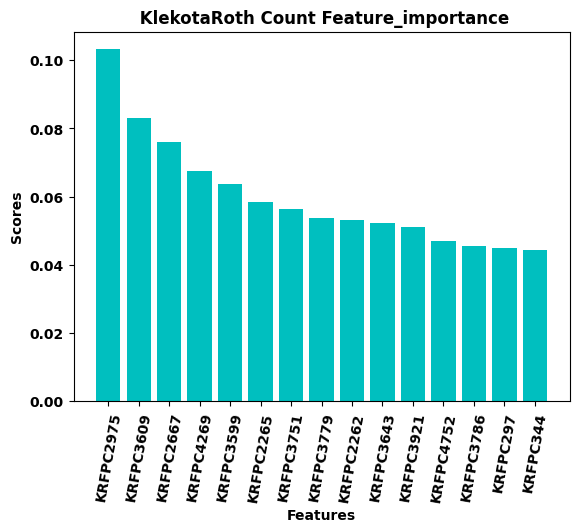

<Figure size 1000x1000 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
data = pd.read_csv('KRCFS2_Features.csv')
df = pd.DataFrame(data)
X = list(df.iloc[:, 1])
Y = list(df.iloc[:, 2])
plt.bar(X, Y, color='c')
plt.title(" KlekotaRoth Count Feature_importance", fontweight="bold")
plt.xlabel("Features", fontweight = 'bold')
plt.ylabel("Scores", fontweight = 'bold')
plt.xticks(rotation = 80, fontweight="bold")
plt.yticks(fontweight="bold")
fig = plt.figure(figsize=(10, 10))
plt.savefig("Features.jpg", bbox_inches = 'tight')

In [28]:
KRCFS2 = pd.concat([X_new,y],axis=1)
KRCFS2


,KRFPC297,KRFPC344,KRFPC2262,KRFPC2265,KRFPC2667,KRFPC2975,KRFPC3599,KRFPC3609,KRFPC3643,KRFPC3751,KRFPC3779,KRFPC3786,KRFPC3921,KRFPC4269,KRFPC4752,class
0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
1225,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0
1226,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0
1227,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0


In [29]:
KRCFS2.to_csv('KRCFS2_after_feature.csv')